In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 10 17:54:23 2020

@author: User
"""

# imports
import pandas as pd
import numpy as np
import matplotlib as plt

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import os
import tarfile
from six.moves import urllib
from collections import Counter

#Natural language Toolkit, and its tools
import nltk
from nltk.probability import FreqDist
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

#other
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#Some engineering to actually get thte data
DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

fetch_spam_data()

HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)
    

ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [3]:
# showing random ham_email
# by the way  ham stands for harmless
print(ham_emails[7])

Return-Path: <Stewart.Smith@ee.ed.ac.uk>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id EF86747C67
	for <zzzz@localhost>; Thu, 22 Aug 2002 10:05:00 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 15:05:01 +0100 (IST)
Received: from n34.grp.scd.yahoo.com (n34.grp.scd.yahoo.com   
 [66.218.66.102]) by dogma.slashnull.org (8.11.6/8.11.6) with SMTP id   
 g7ME1MZ09279 for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 15:01:22
 +0100
X-Egroups-Return: =?utf-8?q?sentto-2242572-52739-1030024883-zzzz=3Dspamassas?=
 =?utf-8?q?sin=2Etaint=2Eorg=40returns=2Egroups=2Eyahoo=2Ecom?=
Received: from [66.218.67.195] by n34.grp.scd.yahoo.com with NNFMP;
    22 Aug 2002 14:01:23 -0000
X-Sender: Stewart.Smith@ee.ed.ac.uk
X-Apparently-To: zzzzteana@yahoogroups.com
Received: (EGP: mail-8_1_0_1); 22 Aug 2002 14:01:23

In [5]:
# showing random spam email
print(spam_emails[9])

Return-Path: <suz0123893616943@yahoo.com>
Delivered-To: zzzz@localhost.spamassassin.taint.org
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 1A60A43F9B
	for <zzzz@localhost>; Fri, 23 Aug 2002 06:02:50 -0400 (EDT)
Received: from mail.webnote.net [193.120.211.219]
	by localhost with POP3 (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:02:50 +0100 (IST)
Received: from enjoya2.enjoya.com ([204.216.233.160])
	by webnote.net (8.9.3/8.9.3) with ESMTP id UAA06531
	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 20:55:12 +0100
Message-Id: <200208221955.UAA06531@webnote.net>
Received: from 65.113.29.188 (SERVER3 [65.113.29.188]) by enjoya2.enjoya.com
 with SMTP (Microsoft Exchange Internet Mail Service Version 5.5.2650.21)	id
 RK2JB8PP; Thu, 22 Aug 2002 11:37:45 -0700
From: "fzjzo" <suz0123893616943@yahoo.com>
To: ricardo1@bbvnet.com, bob.a.jones@address.com,
	zzzz@netcom17.netcom.com, voloon@hotmail.co

In [8]:
!pip install html2text

In [ ]:
                            "We pick an email object and we extract three main features of it"
                            "we select a few relevant words according to some criteria"
                            "and the first feature would be the amount of times each of these"
                            "relevant words appeared in the email"
                            "the second feature would be the structure, for more details in what"
                            "that is just take a look at the get_email_structure method"
                            "the third feature is simply the size of the email text"

In [9]:
                                "Methods to help parsing the email"
    
# each email is composed of a lot of components, those components can be 
# html code, plain text or other types of data like images
# this method outputs a triple, where the first number is the number plain_texts
# components, the second element is the number of html components,
# and the third is the rest of the components
# tested
def get_email_structure(email):
    triple =[0,0,0]
    if isinstance(email, str):
        return triple
    payload = email.get_payload()
    if isinstance(payload, list):
        for sub_email in payload:
            sub_triple = get_email_structure(sub_email)
            triple[0] = triple[0] + sub_triple[0]
            triple[1] = triple[1] + sub_triple[1]
            triple[2] = triple[2] + sub_triple[2]
    else:
        if(email.get_content_type() == "text/plain"):
            triple[0] = 1
        else:
            if(email.get_content_type() == "text/html"):
                triple[1] = 1
            else:
                triple[2] = 1
    return triple

# Converts an email object to a string, containing the content of the 
# email
# tested
import html2text
def email_to_text(email):
    converted_text =""
    Is_html = False
    for chunk in email.walk():
        type_ = chunk.get_content_type()
        if not (type_ =="text/plain" or type_ == "text/html"):
            continue
        try:
            text = chunk.get_content()
        except: # in case of encoding issues
            text = str(chunk.get_payload())
        if type_ == "text/plain":
            converted_text = converted_text + " \n" + text
        else:
            Is_html = True
    if Is_html:
        converted_text = converted_text + " \n" + html2text.html2text(text)
    return converted_text

In [11]:
                                      "these methods are simply helper methods for the methods on the next cell"

# method to stem a sentence, see the definition os stemming online
# tested
from nltk.tokenize import word_tokenize
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

# tranforms a list of pairs, into a dictionary
# where the first element of the pair is the key, and the second is the value
def transform_pairs_to_dict(pairs):
    Dict={}
    for pair in pairs:
        Dict[pair[0]]=pair[1]
    return Dict

def value_getter(dict_, key):
    if key in dict_.keys():
        return dict_[key]
    else:
        return 0

# dict1 is the frequency distribution of words on good emails
# dict2 is the frequency distribution of words on bad emails
# x is a word
# returns how relevant a word is according to the metric
# tested
def metric(dict1, dict2, x):
    value1 = value_getter(dict1, x)
    value2 = value_getter(dict2, x)
    max_ = max(value1, value2)
    min_ = min(value1, value2)
    # if statement to care of division by zeros
    if (min_ == 0):
        if(max_ == 0):
            return 0
        return max_/7
    else:
        return max_/min_

# good_fdist is the frequency distribution of words on ham emails
# bad_fdist is the frequency distribution of words on spam emails
# initial_words are the words that will be evaluated
# benchmark: is the benchmark on how relevant a word needs to be to be included in the answer
# return the words there where considered to be relevant according to the metric and the benchmark
# tested 
def selector(good_fdist, bad_fdist, initial_words, benchmark):
    dict_bad_fdist = dict(bad_fdist)
    dict_good_fdist = dict(good_fdist)        
    method = lambda x: (1 + benchmark < metric(dict_good_fdist, dict_bad_fdist, x))
    return list(filter(method, initial_words))

In [12]:
                                    "these methods are to extract the first feature of the emails"
# takes a list of emails,
# stems them, and remove the punctuation
# returns the freqeuncy distribution of the most common words

def preprocessing(emails, number_of_words, remove_punctuation = True):
    emails_text = list(map(lambda x : email_to_text(x), emails))
    all_emails_text = " ".join(emails_text)
    all_emails_text = stemSentence(all_emails_text)
    # remove punctuation
    if (remove_punctuation):
        translation_table = str.maketrans('', '', string.punctuation)
        all_emails_text = all_emails_text.translate(translation_table)
        all_emails_text = all_emails_text.strip()
    all_emails_nltk_text = nltk.Text(nltk.word_tokenize(all_emails_text))
    
    fdist = list(map(lambda x: [x[0], x[1]/len(emails)],
                     FreqDist(all_emails_nltk_text).most_common(number_of_words)))
    return fdist
  
# method to return the most relevant words according to the disparity
# between the amount of times they appear in the the spam emails and the amount
# of times they appear
# emails: is a list of email objects, 
# number_of_words: is the amount of relevant_words you want
# benchmark: is the benchmark on how relevant a word needs to be to be included in the answer
# remove_punctuation: is True if you want punctuation to be among your relv words
# returns the most relevant words according to the selector method
# tested
def relevant_words_getter_1(spam_emails, ham_emails, number_of_words, benchmark,
                            remove_punctuation = False):
    spam_fdist = preprocessing(spam_emails, number_of_words, remove_punctuation)
    ham_fdist = preprocessing(ham_emails, number_of_words, remove_punctuation)
    
    # initial_words is the the union of the most common words in both distributions
    initial_words = list(set(map(lambda x: x[0], spam_fdist)).union(set(map(lambda x: x[0], ham_fdist)) ))
    
    # filters the most relevant words according to the selector method
    return selector(spam_fdist, ham_fdist, initial_words, benchmark)

# method to return the words that appear the most in the emails
# params: emails is a list of email objects,
# number_of_words is the amount of relevant_words you want
# remove_punctuation is True if you want punctuation to be among your relevant words
# tested
def relevant_words_getter_2(emails, number_of_words, remove_punctuation = True):
    return list(map(lambda x: x[0], preprocessing(emails, number_of_words, remove_punctuation)))

In [13]:
# Main Information: This class receives the X,y parameters as the fit_transform parameters
# it ignores the y parameter, and extract the main features 3 types of features of X
# the features were described a few cells above
# Params:
# relevant_words_getter_info is an array with three elements:
# the first one is 1 or 2, if it is one then we use relevant_words_getter_1
# and if it is 2 then we use relevant_words_getter_2
# the second element of the array is the parameter number of words in both
# relevant_words_getters
# the third element of the array is only used if we are using the relevant_words_getter_1, which is the benchmark
# this returns the most relevant features of each email object according to methods in the previous cells
class Emails_To_Wrap(BaseEstimator, TransformerMixin):
    def __init__(self, relevant_words_getter_info = [1,200, 0.4],
                structure =True, size = True, remove_punctuation = True):
        self.relevant_words_getter_info = relevant_words_getter_info
        self.structure = structure
        self.size =size
        self.remove_punctuation = remove_punctuation

    def fit(self, X, y = None):
        if(self.relevant_words_getter_info[0] == 2):
            self.relevant_words = relevant_words_getter_2(X,
                    self.relevant_words_getter_info[1], self.remove_punctuation)
        else:
            ham_emails = np.array(X)[np.array(y) == 0]
            spam_emails = np.array(X)[np.array(y) == 1]
            self.relevant_words = relevant_words_getter_1(
                    spam_emails,
                    ham_emails,
                    self.relevant_words_getter_info[1], 
                    self.relevant_words_getter_info[2],
                    self.remove_punctuation)
        return self

    def transform(self, X, y = None):
        wrap = []
        relevant_word_counter = []
        structures = []
        sizes = []
        for email_ in X:
            txt = email_to_text(email_) or ""
            if self.remove_punctuation:
                # removing punctuation
                translation_table = str.maketrans('', '', string.punctuation)
                txt = txt.translate(translation_table)
                txt = txt.strip()
            if self.structure:
                structures.append(get_email_structure(email_))
            if self.size:
                sizes.append(len(txt.split()))
            porter = PorterStemmer()
            txt = porter.stem(txt)
            relevant_word_counts = {}
            word_counts = Counter(txt.split())
            for word in self.relevant_words:
                relevant_word_counts[word] = word_counts[word]
            relevant_word_counter.append(relevant_word_counts)
        wrap.extend([relevant_word_counter, structures, sizes])
        return wrap

In [14]:
# Since we are considering the amount of times word appears in a email
# a lot of the fields will be zero. Therefore, we transform the Wrap class
# into a sparse matrix
from scipy.sparse import csr_matrix
class Wrap_To_Sparse_Matrix(BaseEstimator, TransformerMixin):
    def __init__(self):
        print()
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_df = pd.DataFrame()
        for word in list(X[0][0].keys()):
            X_df[word] = list(map(lambda x : x[word], X[0]))
        if X[1]:
            structures_names = ["text\plain", "text\html", "other"]
            for i in range(3):
                X_df[structures_names[i]] = list(map(lambda x : x[i], X[1]))
        if X[2]:
            X_df["size"] = X[2]
        return csr_matrix(X_df)


In [39]:
# we are creating 4 distinct pipelines which extract the main features of the emails in 4 different ways
def pipeline_Creator(relevant_words_getter_info):
    return Pipeline([
      ("first_process", Emails_To_Wrap(relevant_words_getter_info=relevant_words_getter_info)),
      ("second_process", Wrap_To_Sparse_Matrix()),
    ])
pipeline_array = []
pipeline_array.append(pipeline_Creator([2,200, 0.4]))
pipeline_array.append(pipeline_Creator([1,200, 0.2]))
pipeline_array.append(pipeline_Creator([1,200, 0.4]))
pipeline_array.append(pipeline_Creator([1,200, 0.6]))

In [84]:
# X: sparse matrix
# y: dataframe of the answer of the classifcation
# this method tests all kinds of models and then, retruns a chart with the main
# inforamtion of how these models ran
def MLA_Optimizer_Sparse_Matrices(X,y):
    MLA_For_Sparse_Matrices = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.RandomForestClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ]
    
    #split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
    #note: this is an alternative to train_test_split
    cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
    
    #create table to compare MLA metrics
    MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
    MLA_compare = pd.DataFrame(columns = MLA_columns)
    
    #create table to compare MLA predictions
    MLA_predict = y.copy(deep =True)
    
    #index through MLA and save performance to table
    row_index = 0
    for alg in MLA_For_Sparse_Matrices:
    
        #set name and parameters
        MLA_name = alg.__class__.__name__
        print("                          New model passing being trained "+ MLA_name + "                        ")
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
        
        #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
        cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split, return_train_score=True)
        
        MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
        MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
        MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
        #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
        MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
        
        #save MLA predictions - see section 6 for usage
        alg.fit(X, y)
        MLA_predict[MLA_name] = alg.predict(X)
        
        row_index+=1
    MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
    return MLA_compare


In [85]:
# changing X_train from a bunch of emails to a csr_matrix with the most relevant features
X_transformed_array = []
for preprocess_pipeline in pipeline_array:
  X_transformed_array.append(preprocess_pipeline.fit_transform(X))

In [86]:
# produce reports
MLA_Compare_array = []
for X_transformed in X_transformed_array:
  MLA_Compare_array.append(MLA_Optimizer_Sparse_Matrices(X_transformed, y))

                          New model passing being trained AdaBoostClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained BaggingClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

                          New model passing being trained ExtraTreesClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

                          New model passing being trained RandomForestClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

                          New model passing being trained LogisticRegressionCV                        


hey

                          New model passing being trained PassiveAggressiveClassifier                        
                          New model passing being trained SGDClassifier                        
                          New model passing being trained Perceptron                        
                          New model passing being trained BernoulliNB                        
                          New model passing being trained KNeighborsClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained SVC                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained LinearSVC                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                          New model passing being trained DecisionTreeClassifier                        
                          New model passing being trained ExtraTreeClassifier                        
                          New model passing being trained AdaBoostClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained BaggingClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

                          New model passing being trained ExtraTreesClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

                          New model passing being trained RandomForestClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

                          New model passing being trained LogisticRegressionCV                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained PassiveAggressiveClassifier                        
                          New model passing being trained SGDClassifier                        
                          New model passing being trained Perceptron                        
                          New model passing being trained BernoulliNB                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained KNeighborsClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

                          New model passing being trained SVC                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained LinearSVC                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                          New model passing being trained DecisionTreeClassifier                        
                          New model passing being trained ExtraTreeClassifier                        
                          New model passing being trained AdaBoostClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained BaggingClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

                          New model passing being trained ExtraTreesClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

                          New model passing being trained RandomForestClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

                          New model passing being trained LogisticRegressionCV                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained PassiveAggressiveClassifier                        
                          New model passing being trained SGDClassifier                        
                          New model passing being trained Perceptron                        
                          New model passing being trained BernoulliNB                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained KNeighborsClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

                          New model passing being trained SVC                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained LinearSVC                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                          New model passing being trained DecisionTreeClassifier                        
                          New model passing being trained ExtraTreeClassifier                        
                          New model passing being trained AdaBoostClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained BaggingClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

                          New model passing being trained ExtraTreesClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

                          New model passing being trained RandomForestClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

                          New model passing being trained LogisticRegressionCV                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained PassiveAggressiveClassifier                        
                          New model passing being trained SGDClassifier                        
                          New model passing being trained Perceptron                        
                          New model passing being trained BernoulliNB                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained KNeighborsClassifier                        


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

                          New model passing being trained SVC                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

                          New model passing being trained LinearSVC                        


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                          New model passing being trained DecisionTreeClassifier                        
                          New model passing being trained ExtraTreeClassifier                        


In [94]:
maximum_accuracies = []
for MLA_Compare in MLA_Compare_array:
  print(MLA_Compare.to_string())
  maximum_accuracies.append(MLA_Compare["MLA Test Accuracy Mean"].max())

                       MLA Name                                                                                                                                                                                                                                                                                                                                                                                                                         MLA Parameters MLA Train Accuracy Mean MLA Test Accuracy Mean MLA Test Accuracy 3*STD    MLA Time
0            AdaBoostClassifier                                                                                                                                                                                                                                                                                                                       {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}        

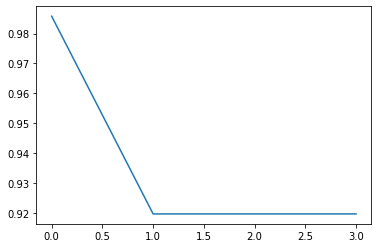

In [95]:
plt.pyplot.plot(maximum_accuracies)

In [ ]:
"As you can see from the graph above, we tested 4 different ways to create  feauters, and each of them we computed"
"the maximum score (accuracy) we got with those features"
"all 4 ways to create the features give good results, but the one that stand out is the first one with 98% accuracy"